In [192]:
# Importing the libraries
import tweepy
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from string import punctuation
import pandas as pd
import seaborn as sns
import csv

In [193]:
# Importing the dependencies
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamodel import LdaModel

In [194]:
# Importing the libraries for TEXT PREPROCESSING
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yugdevbhandari/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [195]:
# Download the NLTK resources
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download('omw-1.4')
!pip install gensim
!pip install tweepy==4.0.0

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/yugdevbhandari/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yugdevbhandari/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/yugdevbhandari/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/yugdevbhandari/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [196]:
# Twitter API credentials
API_Key = "l7OtpAwl1jCebWopIAcCKw5dx"

API_Key_Secret = "bRmU0TPOoifIVfhxiWng7RcgbDf0jKPmGhZOBFmbKC5lmpyX0f"

Access_Token = "66945822-EWIbp9SLeEcWyZWaFt3gIdnc5J528GHiptiYltvQg"

Access_Token_Secret = "pghWZQegcqYjM78weQCvnQy6xv1xtujCXLSEzS7D8zDz5"

In [197]:
# Twitter authentication
auth = tweepy.OAuthHandler(API_Key, API_Key_Secret)   
auth.set_access_token(Access_Token, Access_Token_Secret) 
  
# Creating an API object 
api = tweepy.API(auth)

In [198]:
# Define the function to display related tweets for a word
def display_related_tweets(word):
    # Search for tweets that contain the word
    search_results = api.search(q=word, count=10)
    # Extract the text of the tweets
    tweets = [tweet.text for tweet in search_results]
    # Print the tweets
    for tweet in tweets:
        print(tweet)

In [199]:
# Get the tweets for a specific user
username = "elonmusk"
tweets = api.user_timeline(screen_name=username, count=400, tweet_mode="extended")
# Extract the full text of the tweets
texts = [tweet.full_text for tweet in tweets]
print(texts)

['@BillyM2k 📱 + ☕️', '@SciGuySpace More than days away, but hopefully not many weeks away', '@ashleevance You could literally film a Walking Dead episode unedited in downtown SF.\n\nThis is where San Francisco politics leads and Twitter was exporting this self-destructive mind virus to the world.\n\nWith some exceptions, other tech companies are still doing so. \n\nEvil in guise of good.', '@ashleevance 💯', '@DavidSacks They know they cannot defend what their algorithm actually does, so they will keep it closed', '@PeterDiamandis Ok fine AI should do fashion it’s awesome', '@GlennKesslerWP Only thing on fire are Kessler’s pants', '@gaborgurbacs Steak is great too!', '@GlennKesslerWP “Incendiary” 🤣🤣 🔥🔥', 'Me after 1 day of not eating sugar https://t.co/BP0dqyvcg1', '@MuskUniversity Yeah!!', '@cb_doge @PeterDiamandis @drmarkhyman Somehow, I’m still alive, despite having ice cream since I was a child. It’s a miracle!', '@PeterDiamandis @drmarkhyman Sorry, that’s just the donut talking', '

In [200]:
with open('tweets.csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Text'])
    for text in texts:
        writer.writerow([text])

In [201]:
# Initialize the lemmatizer and Porter stemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words.update(["yeah","wow","good","great","thanks","thank","thank you","thankyou","thank-you"])


In [202]:
# Clean the texts
cleaned_texts = []
for text in texts:
    # Remove URLs
    text = re.sub(r"http\S+", "", text)
    # Remove mentions
    text = re.sub(r"@[^\s]+", "", text)
    # Remove hashtags
    text = re.sub(r"#[^\s]+", "", text)
    # Remove punctuation
    text = re.sub(r"[^\w\s]", "", text)
    # Remove two-letter words
    text = re.sub(r"\b\w{1,2}\b", "", text)
    # Remove short forms
    text = re.sub(r"\b(can't|won't|shouldn't|wouldn't|couldn't|don't|doesn't|didn't|isn't|wasn't|weren't|haven't|hasn't|hadn't|won't|would've|could've|should've|mustn't)\b", lambda match: match.group().replace("'", ""), text)
    # Remove extra whitespace
    text = re.sub(r"\s+", " ", text).strip()
    # Remove non-ASCII characters
    text = text.encode("ascii", "ignore").decode()
    # Tokenize the text
    words = nltk.word_tokenize(text.lower())
    # Remove stop words and non-alphabetic characters
    words = [word for word in words if word.isalpha() and word not in stop_words]
    # Lemmatize and stem the words
    words = [stemmer.stem(lemmatizer.lemmatize(word)) for word in words]
    # Join the words back into a single string
    cleaned_text = ' '.join(words)
    cleaned_texts.append(cleaned_text)
    print(cleaned_text)


day away hope mani week away
could liter film walk dead episod unedit downtown san francisco polit lead twitter export selfdestruct mind viru world except tech compani still evil guis

know defend algorithm actual keep close
fine fashion awesom
thing fire kessler pant
steak
incendiari
day eat sugar

somehow still aliv despit ice cream sinc child miracl
sorri that donut talk
also doc look pretti old someon who age
sugar awesom
wait
recommend code come week open sourc liter everyth contribut show tweet output least roughli approxim

amp
someon make movi
avoid dystopian outcom easi intent algorithm judgi moral arbit rather best inform amp entertain tri maxim unregret userminut seem like right object

die america mar lucki

dont look agi instead comet
accord biolog nn existenti risk human nontrivi

live interest time
realli think singleedg sword
lol

big reckon come due low birth rate japan lead indic
concept
delet learn gone tomorrow
twitter updat recommend algorithm base user suggest ev

In [203]:

# Create a TF-IDF vectorizer
tfidf = TfidfVectorizer(stop_words='english')
# Fit the vectorizer on the cleaned texts
tfidf.fit_transform(cleaned_texts)
# Get the feature names and IDF values
feature_names = tfidf.get_feature_names_out()
idf_values = tfidf.idf_
# Create a dictionary mapping each feature to its IDF value
feature_idf = dict(zip(feature_names, idf_values))

# Define a function to remove less weighty words from a text using the IDF values
def remove_less_weighty_words(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Filter out the tokens with IDF values less than 1.5
    filtered_tokens = [token for token in tokens if feature_idf.get(token, 0) > 1.5]
    # Join the filtered tokens back into a single text
    cleaned_text = " ".join(filtered_tokens)
    return cleaned_text

# Apply the function to each cleaned text to remove less weighty words
clean_text = [remove_less_weighty_words(text) for text in cleaned_texts]
print(clean_text)


['', 'day away hope mani week away', 'liter film walk dead episod unedit downtown san francisco polit lead twitter export selfdestruct mind viru world tech compani evil guis', '', 'know defend algorithm actual close', 'fine fashion awesom', 'thing kessler pant', 'steak', 'incendiari', 'day eat sugar', '', 'aliv despit ice cream sinc child miracl', 'sorri donut talk', 'doc look pretti old someon age', 'sugar awesom', 'wait', 'recommend code come week open sourc liter everyth contribut tweet output roughli approxim', '', 'amp', 'someon make movi', 'avoid dystopian outcom easi intent algorithm judgi moral arbit best inform amp entertain tri maxim unregret userminut like right object', '', 'die america mar lucki', '', 'dont look agi instead comet', 'accord biolog nn existenti risk human nontrivi', '', 'live time', 'realli think singleedg sword', 'lol', '', 'big reckon come low birth rate japan lead indic', 'concept', 'delet learn gone tomorrow', 'twitter updat recommend algorithm base user

In [204]:
# Tokenize the cleaned texts
tokenized_texts = [text.split() for text in clean_text]

# Create the dictionary and corpus
dictionary = Dictionary(tokenized_texts)
corpus = [dictionary.doc2bow(text) for text in tokenized_texts]

In [205]:
from gensim import corpora, models

In [206]:
def lda_model(texts, num_topics):
    # Create a dictionary from the cleaned texts
    dictionary = corpora.Dictionary(texts)
    # Convert the dictionary to a bag-of-words corpus
    corpus = [dictionary.doc2bow(text) for text in texts]
    # Apply LDA model
    lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)
    # Return the LDA model
    return lda_model

In [207]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk import corpus


In [208]:
# Define the function to display related tweets
def display_related_tweets(word):
    # Search for tweets that contain the word
   tweets = tweepy.Cursor(api.search_tweets, q=word, tweet_mode='extended').items(10)
    # Extract the text of the tweets
   tweets = [tweet.full_text for tweet in tweets]
    # Print the tweets
   for tweet in tweets:
        print(tweet)

In [209]:
# Apply LDA for topic modeling
num_topics = 15
lda_model = lda_model([text.split() for text in clean_text], num_topics=num_topics)


{'sure': 0.04007452, 'wild': 0.039800037, 'time': 0.039279975, 'said': 0.013979176, 'servic': 0.018291144, 'human': 0.022024477, 'amp': 0.03359245, 'term': 0.013979172, 'account': 0.013979172, 'dont': 0.013979172, 'risk': 0.019631812, 'existenti': 0.01963181, 'accord': 0.019631809, 'nontrivi': 0.019631809, 'biolog': 0.019631809, 'nn': 0.019999877, 'brew': 0.019631801, 'avail': 0.019631801, 'cyborg': 0.019631797, 'note': 0.03528751, 'ftw': 0.035287507, 'custom': 0.01829115, 'cours': 0.018291146, 'need': 0.019999877, 'money': 0.018291144, 'agi': 0.01829114, 'work': 0.01829114, 'comet': 0.01829114, 'away': 0.025101334, 'web': 0.025101226, 'suggest': 0.0129554095, 'twitter': 0.010630249, 'updat': 0.0129554095, 'ask': 0.012955408, 'algorithm': 0.019998396, 'sinc': 0.022024486, 'base': 0.012955407, 'forgot': 0.012955405, 'old': 0.025092203, 'countri': 0.012950734, 'absorb': 0.012950732, 'inflat': 0.012950731, 'govern': 0.01295073, 'signific': 0.01295073, 'forc': 0.01295073, 'excess': 0.01295

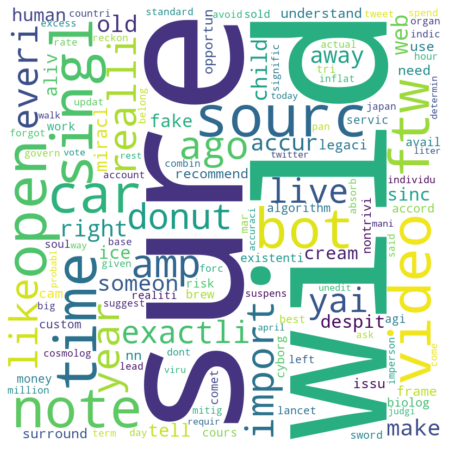

Millions of tech on, in the USA, at the same time, heated it, called, "global warming," but before that, it was warm, cool, and cold, it cannot be ruled out, see how Antarctica has greatly melted.
RT @ClimateReality: “It was 16 years ago that the IPCC and Al Gore won a Nobel Peace Prize for efforts to highlight the dangers of climate…
RT @ClimateReality: “It was 16 years ago that the IPCC and Al Gore won a Nobel Peace Prize for efforts to highlight the dangers of climate…
Bend Emissions Curve Fast

Akshat Rathi
27APR2021

https://t.co/UH9d5gFXtu…

world wants to slow global warming, advancing clean tech not enough.

hard work cutting fossil fuels

#sdgs
#carfreemegacities
#netzeromegacities 

@GovKathyHochul @NYCMayor @NYCCouncil @NYCComptroller
RT @ClimateReality: “It was 16 years ago that the IPCC and Al Gore won a Nobel Peace Prize for efforts to highlight the dangers of climate…
global warming accelerationist
RT @TCRG2012: A 🇧🇪 man ended his life after a 6-week conversation regardi

In [210]:
# Create the word cloud
word_freqs = {word[0]: word[1] for topic in lda_model.show_topics(num_topics=num_topics, formatted=False) for word in topic[1]}
wordcloud = WordCloud(width=800, height=800, background_color="white").generate_from_frequencies(word_freqs)

print(word_freqs)
# Plot the word cloud
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Test the display_related_tweets function
word = "global warming"
display_related_tweets(word)

In [211]:
# Get the top 10 words from word_freqs
top_words = sorted(word_freqs.items(), key=lambda x: x[1], reverse=True)[:10]

# Get related tweets for the top 10 words
related_tweets = {}
for word, freq in top_words:
    related_tweets[word] = [tweet.text for tweet in tweepy.Cursor(api.search_tweets, q=word, lang='en').items(10)]
# Print the related tweets in a table
data = []
for word, tweets in related_tweets.items():
    tweets = "\n".join(tweets)
    data.append([word, tweets])
df = pd.DataFrame(data, columns=["Word", "Related Tweets"])
print(df)



    Word                                     Related Tweets
0   sure  RT @admirim: "Make sure that not one of them i...
1   wild  @Naozymandias Destiny's "hard limits" on trans...
2  sourc  A sourc #推特账号 e of illumination of the world；H...
3   open  RT @Vholic_: I'm so glad that Kths are Wonderf...
4   time  RT @overlinenetwork: Just as foretold in the A...
5  singl  @iphankiedis Stay singL\n@kelirputih @unnesmen...
6  video  RT @instablog9ja: Video of Davido’s music vide...
7    bot  I think you understand it without my telling, ...
8   note  RT @KatyMontgomerie: The community note on thi...
9    ftw  Strong showing per usual \n\n@gabrieljesus9 wi...


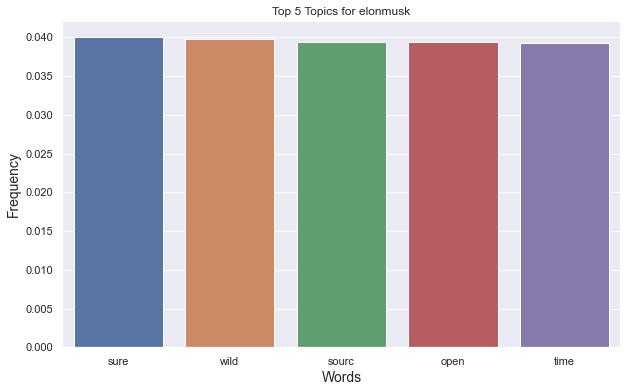

In [212]:

# Get the top 5 words from word_freqs
top_words = sorted(word_freqs.items(), key=lambda x: x[1], reverse=True)[:5]

# Create a DataFrame with the top 5 words and their frequencies
df = pd.DataFrame(top_words, columns=["Word", "Frequency"])
# Set the plot size
sns.set(rc={"figure.figsize":(10, 6)})
# Plot the bar graph using seaborn
sns.set_style("darkgrid")
sns.barplot(x="Word", y="Frequency", data=df)
plt.title('Top 5 Topics for {}'.format(username))
plt.xlabel("Words", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()
